In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


# Importing Modules

In [ ]:
# import data handling libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Exploring Dataset

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
print(df.columns)
df = df.drop('time', axis=1)
print(df)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1          

In [ ]:
print(df.to_string())

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  DEATH_EVENT
0    75.000        0                       582         0                 20                    1  265000.00              1.90           130    1        0            1
1    55.000        0                      7861         0                 38                    0  263358.03              1.10           136    1        0            1
2    65.000        0                       146         0                 20                    0  162000.00              1.30           129    1        1            1
3    50.000        1                       111         0                 20                    0  210000.00              1.90           137    1        0            1
4    65.000        1                       160         1                 20                    0  327000.00              2.70           116    0        0            

Shape

In [ ]:
rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 299
Number Of Columns : 12


Sample Data

In [ ]:
df.loc[0]

age                             75.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              1.0
platelets                   265000.0
serum_creatinine                 1.9
serum_sodium                   130.0
sex                              1.0
smoking                          0.0
DEATH_EVENT                      1.0
Name: 0, dtype: float64

Information about Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 38.5 KB


Some stats about data

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


Unique values

In [ ]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
DEATH_EVENT                   2
dtype: int64

Tops 5 rows

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


# Data Cleaning

Dropping null values

In [ ]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


Removing Duplicates

In [ ]:
# Check for and display duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicates)

# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates are removed
print("After removing duplicates:")
print(df.shape)  # Check the shape of the DataFrame after removing duplicates

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, DEATH_EVENT]
Index: []
After removing duplicates:
(299, 12)


Checking for null values

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

Showing correlation

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


Correlation as Heatmap

<Axes: >

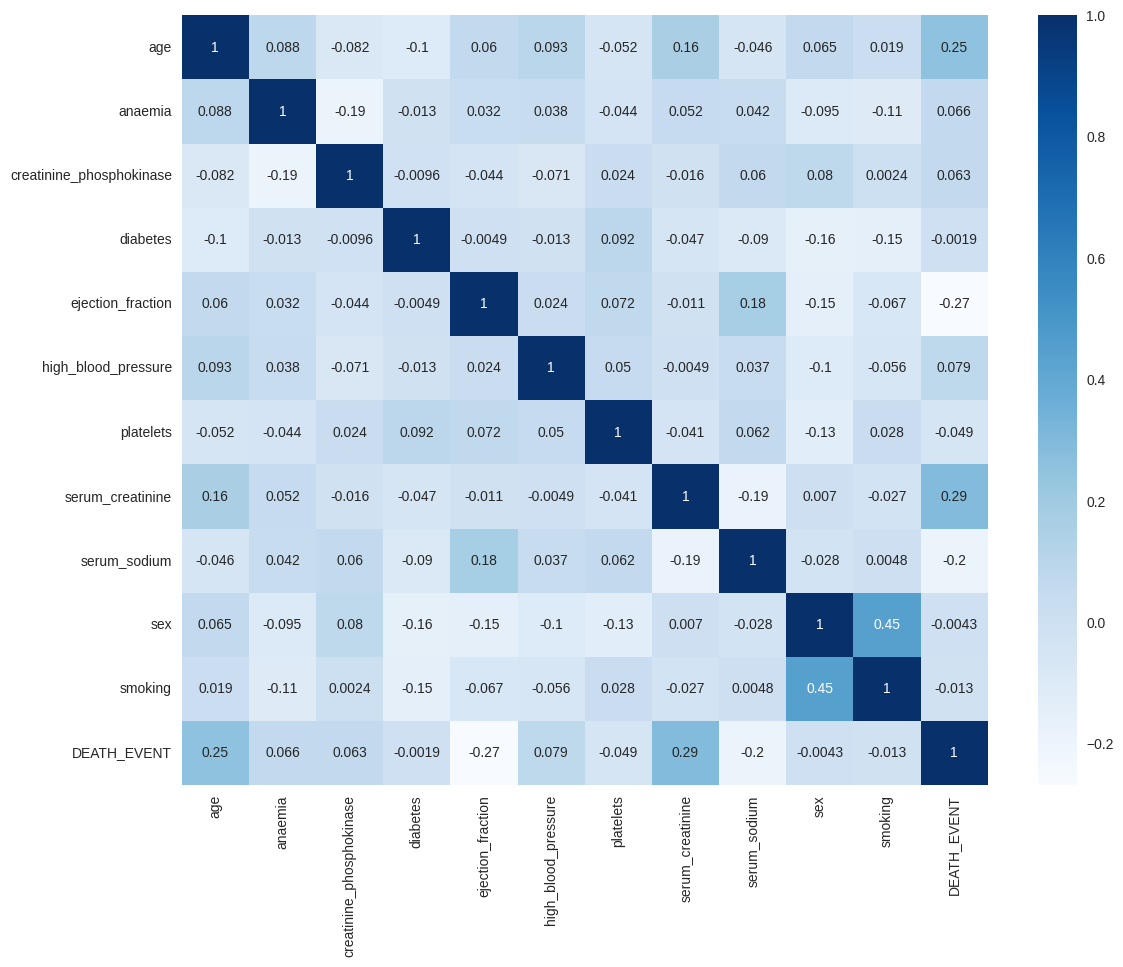

In [ ]:
plt.figure(figsize=(13, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

Checking outliers

In [ ]:
binary_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary_columns.append(column)

print("Binary Columns:", binary_columns)

Binary Columns: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


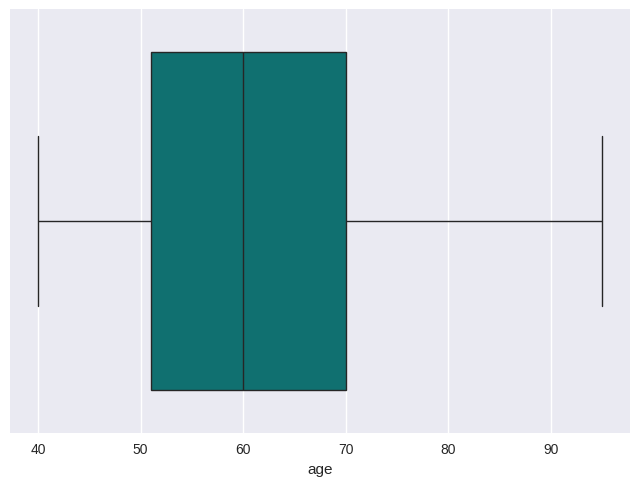

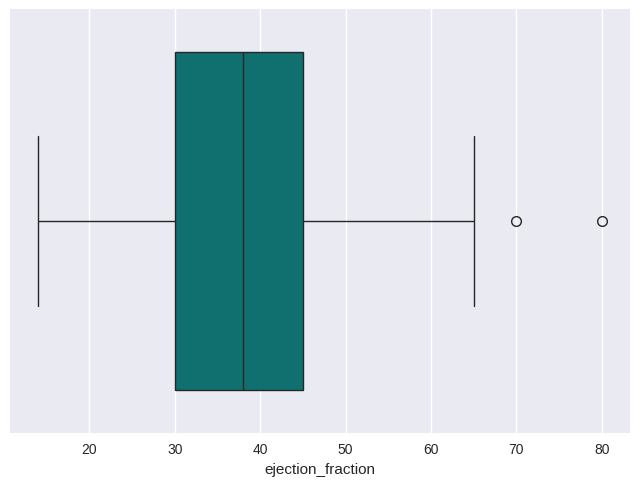

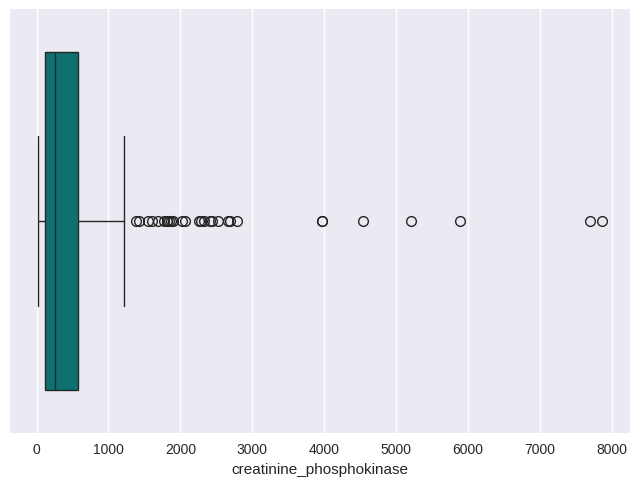

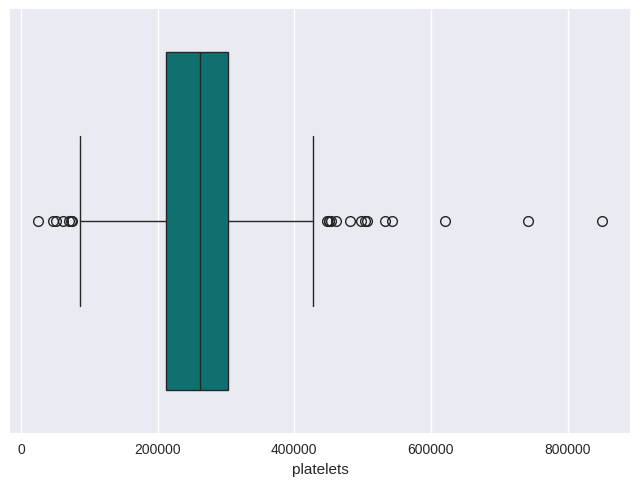

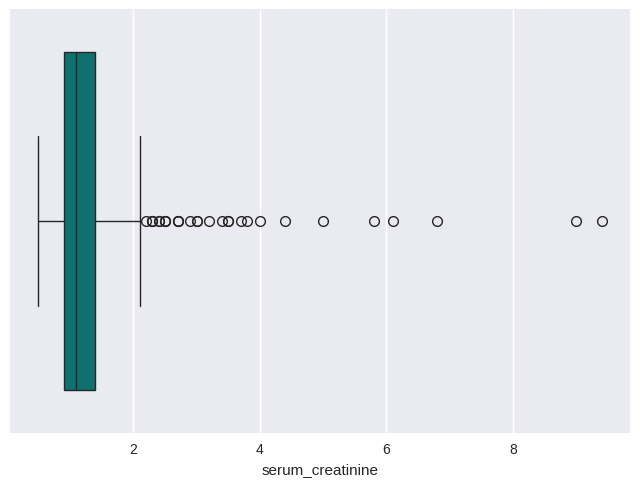

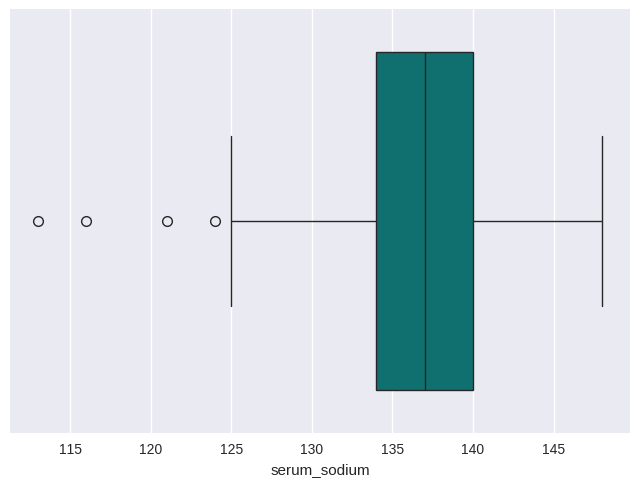

In [ ]:
# Boxplot for age
sns.boxplot(x = df.age, color='teal')
plt.show()

# Boxplot for ejection_fraction
sns.boxplot(x = df.ejection_fraction, color='teal')
plt.show()

# Boxplot for creatinine_phosphokinase
sns.boxplot(x = df.creatinine_phosphokinase, color='teal')
plt.show()

# Boxplot for platelets
sns.boxplot(x = df.platelets, color='teal')
plt.show()

# Boxplot for serum_creatinine
sns.boxplot(x = df.serum_creatinine, color='teal')
plt.show()

# Boxplot for serum_sodium
sns.boxplot(x = df.serum_sodium, color='teal')
plt.show()


# Feature selection

[0.13762292 0.03131483 0.1112341  0.04719807 0.17174158 0.02862965
 0.10604684 0.17268961 0.11625651 0.03719368 0.0400722 ]


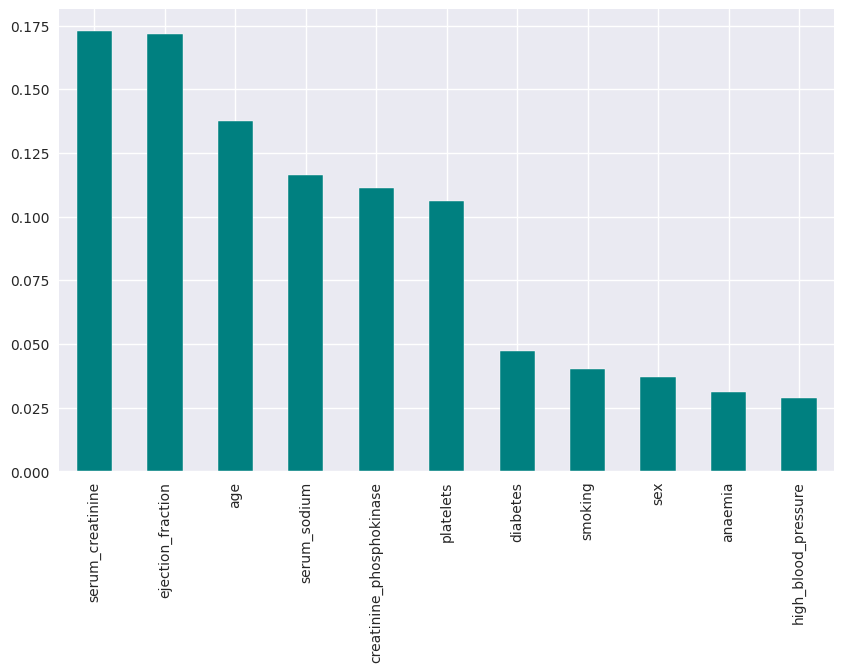

In [ ]:
plt.rcParams['figure.figsize']=10,6
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='bar', color='teal')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.845, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.193, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.845, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==0)]

label1 = ["Anaemic","Non-Anaemic"]
label2 = ['Anaemic - Survived','Anaemic - Died', "Non-Anaemic -  Survived", "Non-Anaemic - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIC VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET  \
                   ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANEAMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANEAMIA VS DEATH_EVENT', x=0.849, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT",
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(df, x="age", color="diabetes",hover_data=df.columns,
                   title ="Distribution of AGE Vs DIABETES",
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT",
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

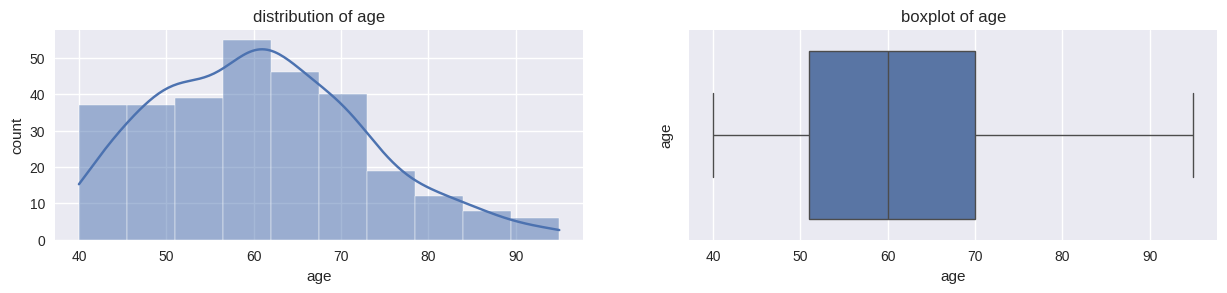

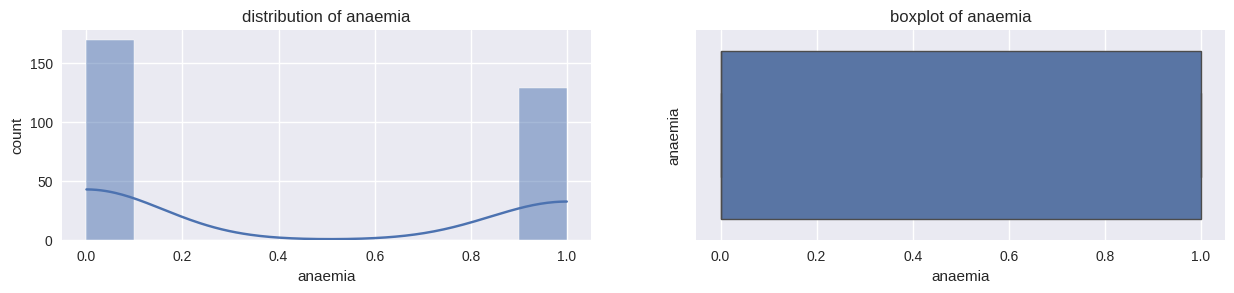

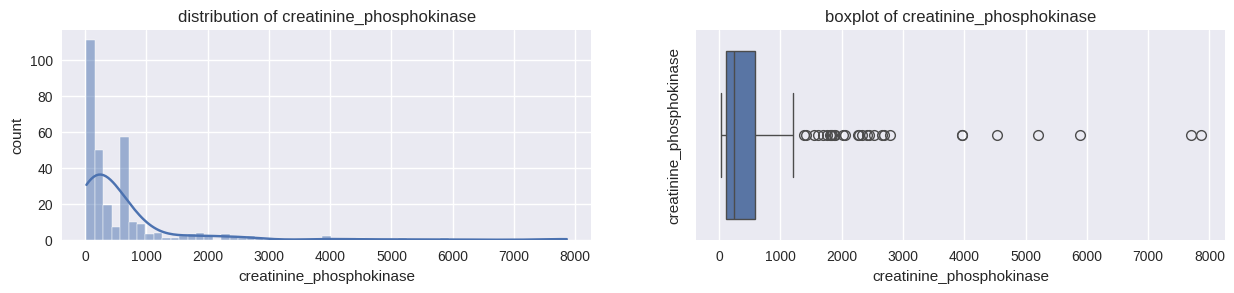

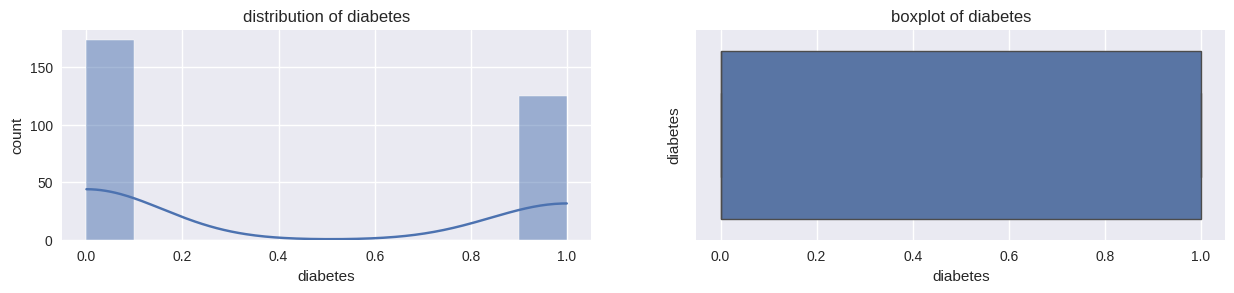

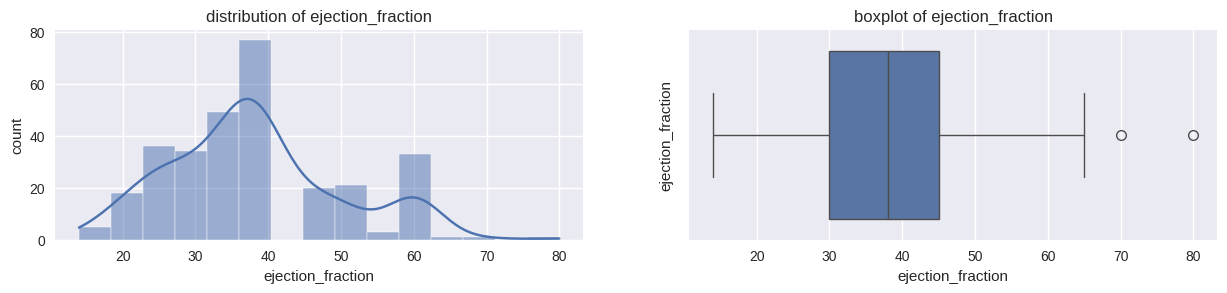

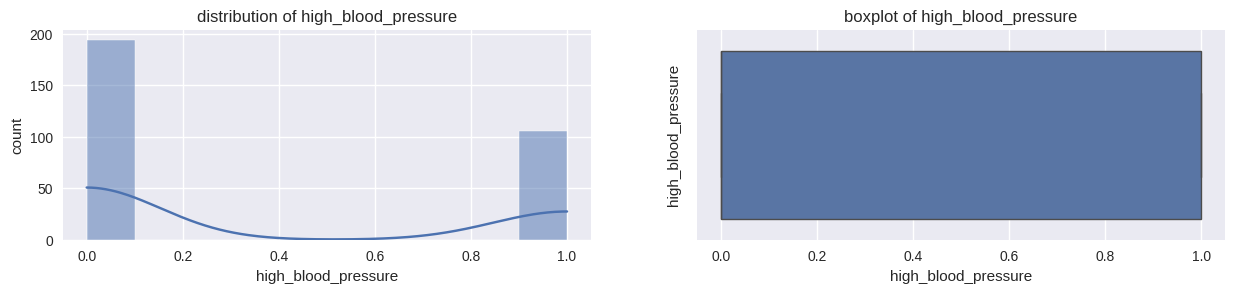

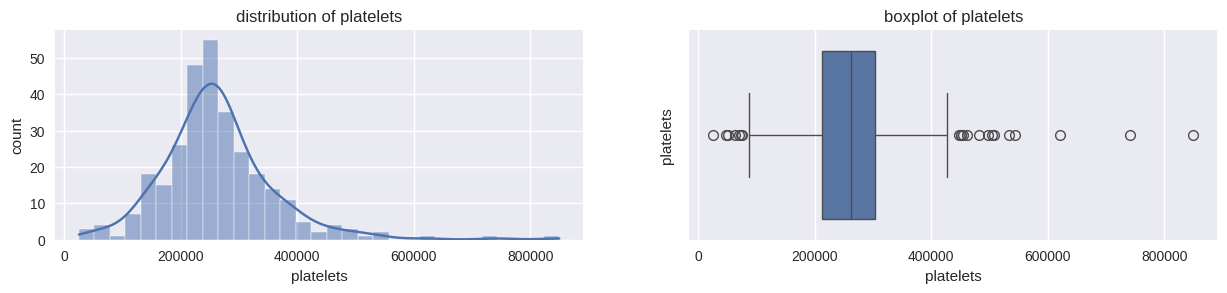

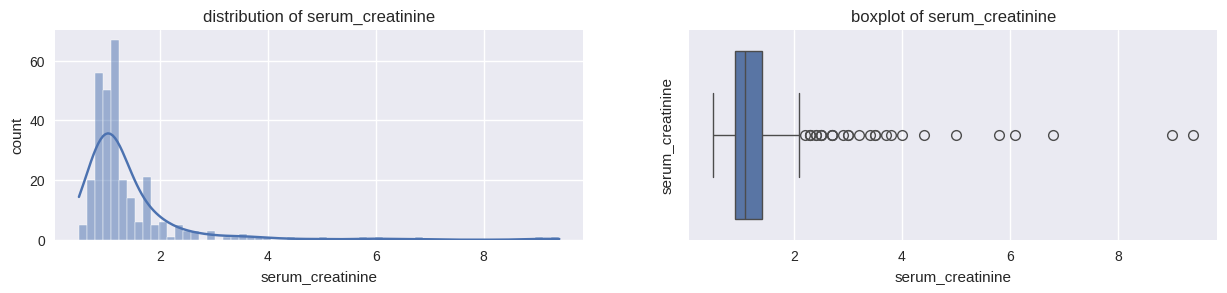

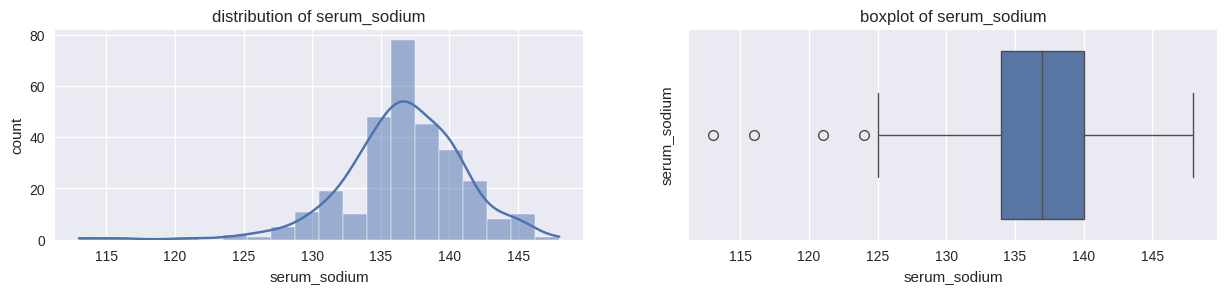

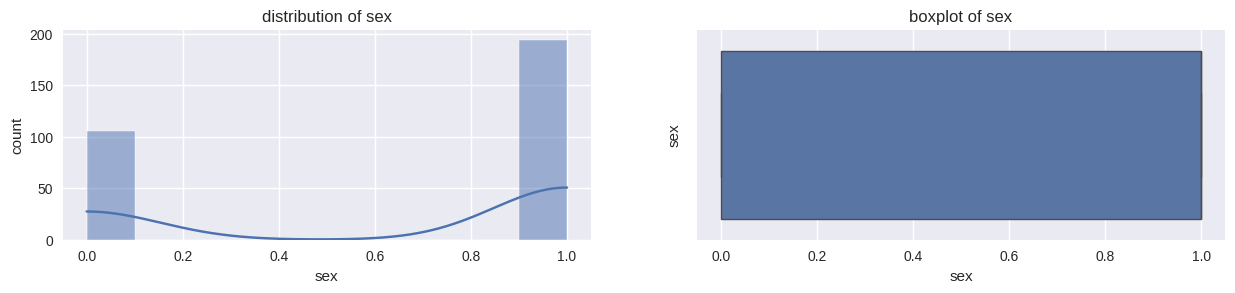

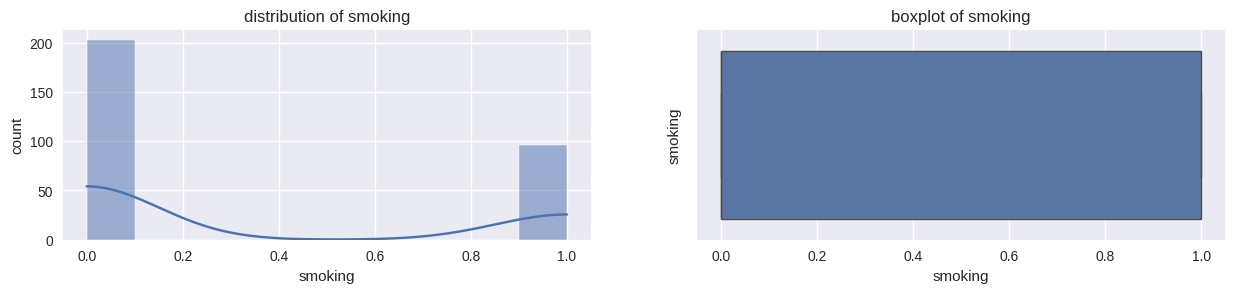

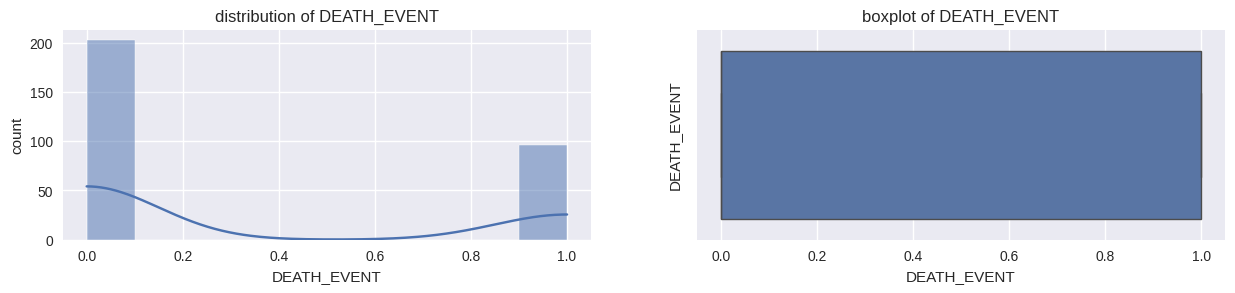

In [ ]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("count")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

# Splitting data

In [ ]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (239, 11)
The Shape of x_test : (60, 11)
The Shape of y_train : (239, 1)
The Shape of y_test : (60, 1)
